In [2]:
import numpy as np
import pandas as pd
import mne
import os
import warnings
import matplotlib.pyplot as plt

In [3]:
mne.set_log_level("ERROR")
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [4]:
data = np.load("preprocessed_data_1/PN00-1.npz")
print(data.files)

['data', 'sfreq', 'channels']


In [23]:
RAW_ROOT = "raw_dataset"
channel_nos = dict()
channel_set = set()
for patient in sorted(os.listdir(RAW_ROOT)):
    patient_dir = os.path.join(RAW_ROOT, patient)
    if not os.path.isdir(patient_dir):
        continue

    # print(f"\n===== {patient} =====")

    for file in sorted(os.listdir(patient_dir)):
        if not file.endswith(".edf"):
            continue

        edf_path = os.path.join(patient_dir, file)

        raw = mne.io.read_raw_edf(edf_path, preload=False, verbose=False)
        raw = raw.pick("eeg")
        channel_nos[file] = len(raw.ch_names)
        for channel in raw.ch_names:
            channel_set.add(channel)
        # print(f"\n{file}")
        # print(f"  Total channels: {len(raw.ch_names)}")
        # print(f"  Channel names:")
        # print(f"  {raw.ch_names}")
print(len(channel_nos))
print(len(channel_set))

41
52


In [21]:
print(channel_set)

{'31', 'EEG C4', 'EEG F7', 'EEG Fc6', '61', 'EEG C3', 'EEG P3', '1', 'EEG FP2', '64', 'EEG Fc1', 'EEG P9', 'A', 'EEG F9', 'EEG Cz', 'EKG EKG', '3', 'EEG F10', 'EEG Cp5', 'EEG F3', 'EEG Fc5', 'EEG Cp2', 'EEG T3', 'EEG Fp2', 'B', 'EEG O1', 'EEG P4', 'EEG F8', 'EEG Fc2', 'EEG T6', 'EEG Cp1', 'EEG CZ', '63', 'EEG Cp6', 'EEG Fz', '2', 'C', 'PLET', '33', '62', 'EEG O2', 'D', '23', 'EEG Fp1', 'EEG F4', 'EEG P10', 'MK', 'EEG Pz', 'EEG T4', 'EEG T5', 'SPO2', 'HR'}


<BarContainer object of 41 artists>

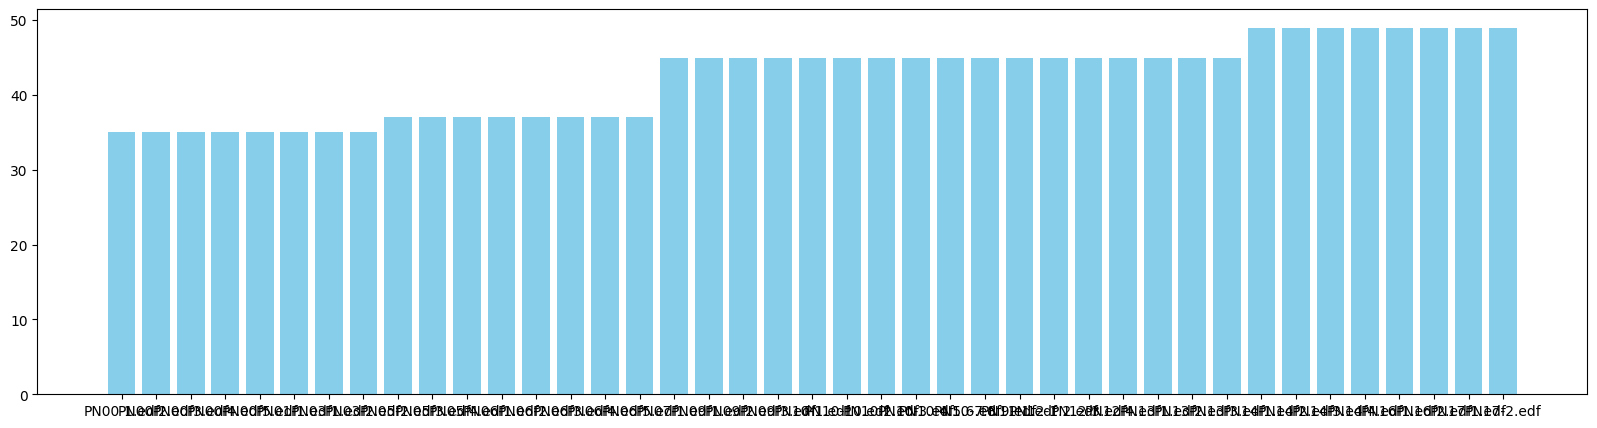

In [16]:
# 3. Create the bar graph
plt.figure(figsize=(20, 5)) # Optional: Adjust figure size
plt.bar(channel_nos.keys(), channel_nos.values(), color='skyblue')

In [17]:
print(max(channel_nos.values()))

49


In [19]:
edf_path = os.path.join(r"raw_dataset/PN00", file)

raw = mne.io.read_raw_edf(r"raw_dataset/PN00/PN00-1.edf", preload=False, verbose=False)
# channel_nos[file] = len(raw.ch_names)
print(raw.ch_names[:35])

['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EKG EKG', 'SPO2', 'HR', '1', '2', 'MK']


In [24]:
from collections import Counter

channel_counter = Counter()

for patient in sorted(os.listdir(RAW_ROOT)):
    patient_dir = os.path.join(RAW_ROOT, patient)
    if not os.path.isdir(patient_dir):
        continue

    for file in os.listdir(patient_dir):
        if not file.endswith(".edf"):
            continue

        raw = mne.io.read_raw_edf(
            os.path.join(patient_dir, file),
            preload=False,
            verbose=False
        )
        raw.pick("eeg")
        channel_counter.update(raw.ch_names)

for ch, count in channel_counter.most_common():
    print(ch, count)


EEG Fp1 41
EEG F3 41
EEG C3 41
EEG P3 41
EEG O1 41
EEG F7 41
EEG T3 41
EEG T5 41
EEG Fc1 41
EEG Fc5 41
EEG Cp1 41
EEG Cp5 41
EEG F9 41
EEG Fz 41
EEG Pz 41
EEG F4 41
EEG C4 41
EEG P4 41
EEG O2 41
EEG F8 41
EEG T4 41
EEG T6 41
EEG Fc2 41
EEG Fc6 41
EEG Cp2 41
EEG Cp6 41
EEG F10 41
SPO2 41
HR 41
1 41
2 41
MK 41
EEG FP2 35
EEG Cz 33
EKG EKG 33
EEG P9 33
EEG P10 33
B 25
C 25
D 25
PLET 25
61 25
62 25
63 25
64 25
EEG CZ 8
3 8
23 8
33 8
31 8
A 8
EEG Fp2 6


In [5]:
npz = np.load("preprocessed_data_1/PN00-1.npz")
X = npz["data"]

print(X.shape)


(27, 153601)


In [3]:
df = pd.read_csv("patient_metadata.csv")
df

,patient_id,age_years,gender,seizure,localization,lateralization,eeg_channel,number_seizures,rec_time_minutes
0,PN00,55,Male,IAS,T,R,29,5,198
1,PN01,46,Male,IAS,T,L,29,2,809
2,PN03,54,Male,IAS,T,R,29,2,752
3,PN05,51,Female,IAS,T,L,29,3,359
4,PN06,36,Male,IAS,T,L,29,5,722
5,PN07,20,Female,IAS,T,L,29,1,523
6,PN09,27,Female,IAS,T,L,29,3,410
7,PN10,25,Male,FBTC,F,Bilateral,20,10,1002
8,PN11,58,Female,IAS,T,R,29,1,145
9,PN12,71,Male,IAS,T,L,29,4,246


In [4]:
df.columns

Index(['patient_id', ' age_years', ' gender', ' seizure', ' localization',
       ' lateralization', ' eeg_channel', ' number_seizures',
       ' rec_time_minutes'],
      dtype='object')